<a href="https://colab.research.google.com/github/gabrielahubner/Trabalho-Individual-II/blob/main/Trabalho_Individual_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Trabalho Individual II***
**Aluna:** Gabriela Franco

**Repositório:** https://github.com/gabrielahubner/Trabalho-Individual-II

## *Dicionário de variáveis*



O dicionário das variáveis utilizados para este trabalho pode ser encontrado neste link.

#Bibliotecas

Importação das bibliotecas utilizadas 

In [231]:
!pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [232]:
import datetime
import time
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import sklearn  # scikit-learn
import requests
import math
import matplotlib.pyplot as plt
from geopy import geocoders
from geopy import distance
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from shapely.geometry import Point

#Importação dos dados

Importação das bases de dados que estão hospedadas no GitHub.
> Para fim de organização, a base de dados "Buffets Porto Alegre" será denominada "df1", enquanto a base de dados "Escolas Porto Alegre" será "df2".

In [156]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/gabrielahubner/Trabalho-Individual-II/main/Base%20Buffets%20Porto%20Alegre.csv"
df1 = pd.read_csv(url1, sep=';')

url2 = "https://raw.githubusercontent.com/gabrielahubner/Trabalho-Individual-II/main/Escolas%20Porto%20Alegre.csv"
df2 = pd.read_csv(url2, sep=";")

url3 = "https://raw.githubusercontent.com/gabrielahubner/Trabalho-Individual-II/main/Bairros.csv"
df3 = pd.read_csv(url3, sep=";")

#  Análise inicial dos dados 

In [157]:
df1.shape



(36, 7)

In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   buffet  36 non-null     object 
 1   end     36 non-null     object 
 2   bairro  36 non-null     object 
 3   aval    36 non-null     float64
 4   qtd     36 non-null     int64  
 5   lat     36 non-null     float64
 6   long    36 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ KB


In [159]:
df2.shape

(642, 6)

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   escola     642 non-null    object
 1   end        642 non-null    object
 2   bairro     642 non-null    object
 3   cep        642 non-null    object
 4   tam_esc    642 non-null    object
 5   class_tam  642 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 30.2+ KB


In [161]:
df2 = df2.drop('escola', axis=1)

In [162]:
print (df2)

                                       end              bairro        cep  \
0                 Avenida Juca Batista, 21          Ipanema     91760-140   
1                Rua Maestro Mendanha, 240          Santana     90620-160   
2             Rua Frederico Etzberger, 301           Nonoai     91720-510   
3                        Rua Luzitana, 483     Higienopolis     90520-080   
4                         Rua Regente, 176       Petropolis     90470-170   
..                                     ...                 ...        ...   
637                       R Ana Julia, 176  Lomba Do Pinheiro   91550-000   
638           Rua Carlos Von Koseritz, 505          Sao Joao    90540-031   
639              R Domingos Jose Poli, 331         Restinga     91790-072   
640       Rua Doutor Dias De Carvalho, 278         Tristeza     91910-270   
641  Av Bernardino Silveira Pastoriza, 641       Rubem Berta    91160-310   

       tam_esc  class_tam  
0          <50          1  
1          <50     

In [163]:
df3.shape

(95, 2)

In [164]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bairro  95 non-null     object
 1   regiao  95 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


Desconsideração dos bairros nas regiões das extremidades da cidade, para fins de localidade mais centrais

In [165]:
desconsideradas = ['Ilhas','Humaitá/Navegantes','Norte','Nordeste','Lomba do Pinheiro', 'Restinga', 'Extremo-sul']
df3 = df3[~df3['regiao'].isin(desconsideradas)]

print (df3)

                bairro      regiao
0   Aberta Dos Morros          Sul
4       Auxiliadora         Centro
5            Azenha         Centro
6         Bela Vista        Centro
8        Belem Velho        Gloria
..                 ...         ...
90     Vila Ipiranga      Noroeste
91      Vila Jardim          Leste
92   Vila Joao Pessoa     Partenon
93         Vila Nova    Centro Sul
94       Vila São José    Partenon

[73 rows x 2 columns]


União da base das escolas com a desconsideração das regiões extremas

In [166]:
escola_bairro = df2.merge(df3, on='bairro')
print (escola_bairro)

                              end               bairro        cep  \
0        Avenida Juca Batista, 21           Ipanema     91760-140   
1               R Morro Alto, 433           Ipanema     91751-650   
2     Travessa Pedra Redonda, 400           Ipanema     91760-630   
3    Avenida Coronel Marcos, 1959           Ipanema     91760-000   
4               Av Tramandai, 395           Ipanema     91760-050   
..                            ...                  ...        ...   
417      Praca Joao Bergmann, 235      Vila Assuncao    91900-070   
418   Avenida Pereira Passos, 936      Vila Assuncao    91900-240   
419            Av Cel Marcos, 163      Pedra Redonda    91770-000   
420         Rua Dos Biazetto, 100         Campo Novo    91750-063   
421          Rua Olrlando Aita, 2  Jardim Leopoldina    91240-030   

         tam_esc  class_tam         regiao  
0            <50          1            Sul  
1      201 e 500          3            Sul  
2     501 e 1000          4         

In [167]:
escola_bairro.head ()

,end,bairro,cep,tam_esc,class_tam,regiao
0,"Avenida Juca Batista, 21",Ipanema,91760-140,<50,1,Sul
1,"R Morro Alto, 433",Ipanema,91751-650,201 e 500,3,Sul
2,"Travessa Pedra Redonda, 400",Ipanema,91760-630,501 e 1000,4,Sul
3,"Avenida Coronel Marcos, 1959",Ipanema,91760-000,>1000,5,Sul
4,"Av Tramandai, 395",Ipanema,91760-050,51 e 200,2,Sul


Visualizar a distribuição dos dados para variável 'bairro'

In [207]:
numescolas_bairro = pd.DataFrame(escola_bairro["bairro"].value_counts())

In [210]:
numescolas_bairro.columns = ['num']

In [212]:
numescolas_bairro.reset_index(inplace=True)


In [214]:
numescolas_bairro.columns = ['bairro', 'num']
print (numescolas_bairro)

                 bairro  num
0         Rubem Berta     27
1         Petropolis      21
2           Partenon      17
3         Menino Deus     16
4        Santa Tereza     14
..                  ...  ...
63      Jardim Floresta    1
64     Parque Santa Fe     1
65       Vila Jardim       1
66          Serraria       1
67  Jardim Leopoldina      1

[68 rows x 2 columns]


In [215]:
numescolas_bairro.shape

(68, 2)

In [216]:
numescolas_bairro.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bairro  68 non-null     object
 1   num     68 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


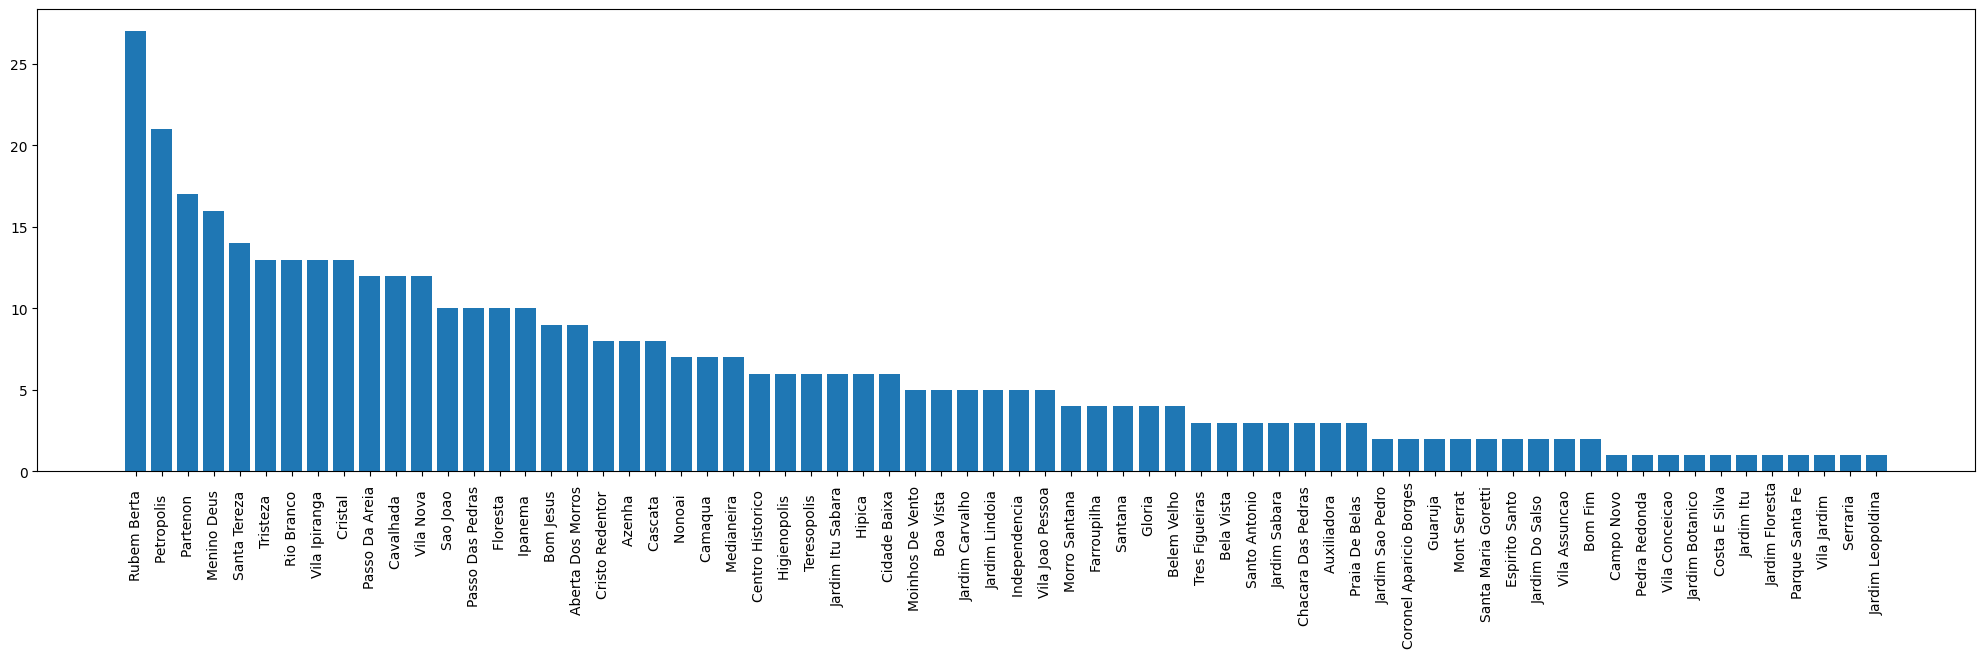

In [169]:
import matplotlib.pyplot as plt

df_freq = escola_bairro['bairro'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6)) # Define o tamanho da figura
plt.bar(df_freq.index, df_freq.values)
plt.xticks(rotation=90)
plt.show()

Visualização da soma dos tamanho das escolas por bairro. A classificação foi realizada da seguinte maneira: 
* Menos de 50 alunos = 1
* Entre 51 e 200 alunos = 2
* 201 e 500 alunos = 3
* Entre 501 e 1000 alunos = 4
* Mais de 1000 alunos = 5

In [170]:
soma_tamanho_bairro = escola_bairro.groupby('bairro')['class_tam'].sum()

print(soma_tamanho_bairro)

bairro
Aberta Dos Morros     10
Auxiliadora            5
Azenha                17
Bela Vista             5
Belem Velho            8
                      ..
Vila Conceicao         1
Vila Ipiranga         28
Vila Jardim            2
Vila Joao Pessoa       8
Vila Nova             26
Name: class_tam, Length: 68, dtype: int64


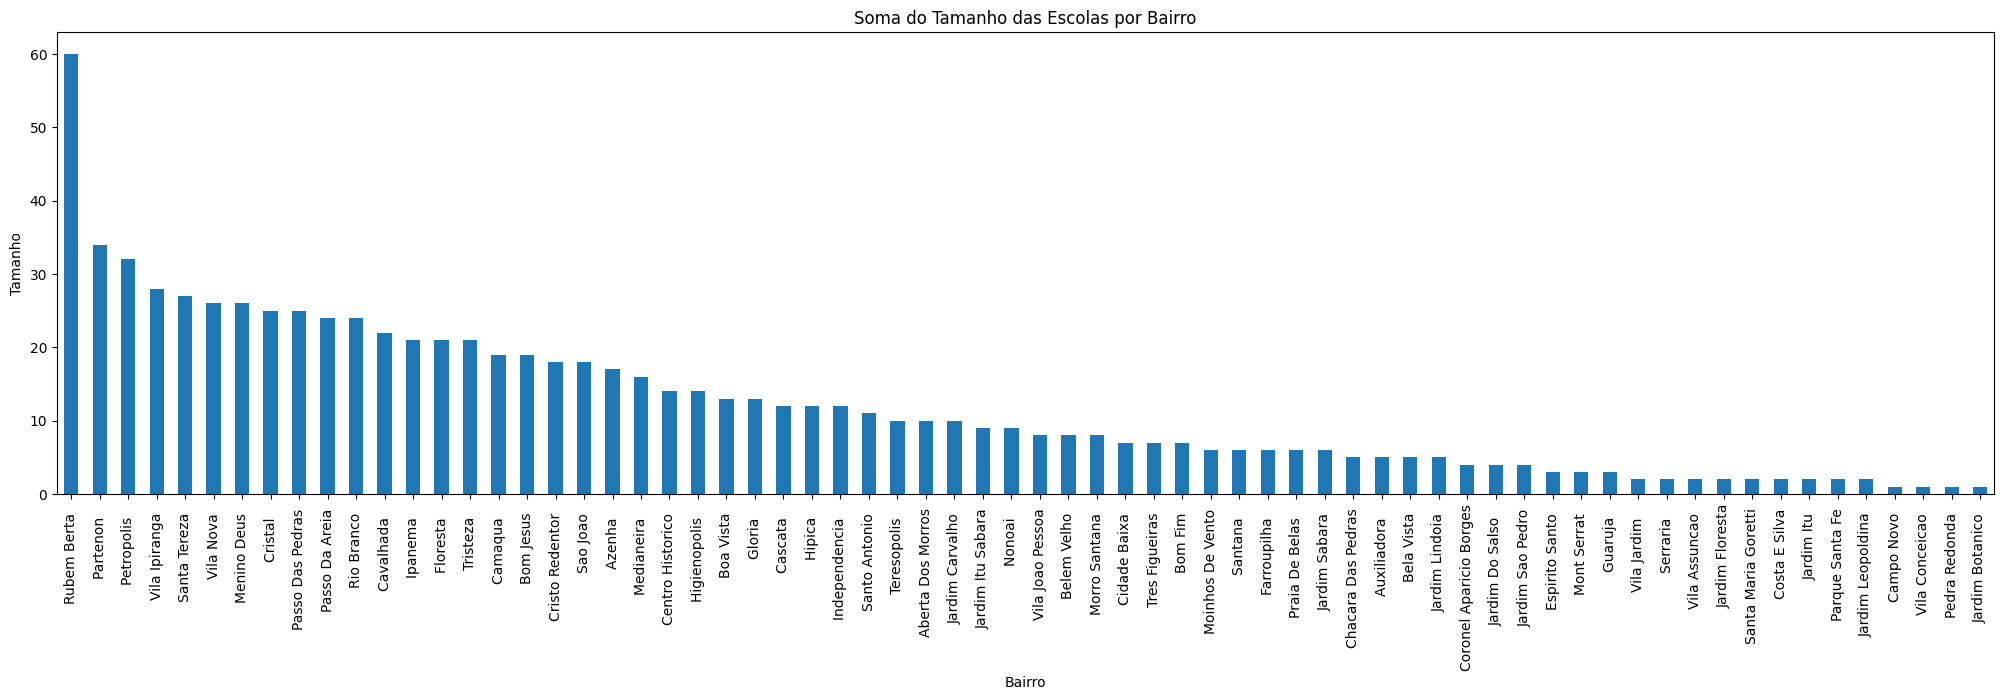

In [171]:
# Plotar gráfico de barras da soma do tamanho das escolas por bairro
soma_tamanho_bairro = soma_tamanho_bairro.sort_values(ascending=False)
soma_tamanho_bairro.plot(kind='bar', figsize=(25, 6))
plt.title('Soma do Tamanho das Escolas por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Tamanho')
plt.show()

In [179]:
buffets = df1.merge(escola_bairro, on='bairro')
print (buffets)

                  buffet                          end_x            bairro  \
0    Ioio Tres Figueiras          Rua Luiz Voelcker 260  Tres Figueiras     
1    Ioio Tres Figueiras          Rua Luiz Voelcker 260  Tres Figueiras     
2    Ioio Tres Figueiras          Rua Luiz Voelcker 260  Tres Figueiras     
3    Hello Party Gallery  Doutor Prudente de Moraes 592  Tres Figueiras     
4    Hello Party Gallery  Doutor Prudente de Moraes 592  Tres Figueiras     
..                   ...                            ...               ...   
294          Guma Festas        R Placido de Castro 112         Azenha      
295          Guma Festas        R Placido de Castro 112         Azenha      
296          Guma Festas        R Placido de Castro 112         Azenha      
297          Guma Festas        R Placido de Castro 112         Azenha      
298          Guma Festas        R Placido de Castro 112         Azenha      

     aval  qtd        lat       long                           end_y  \
0  

In [173]:
buffets_bairro = buffets.groupby('bairro').agg({'aval': np.mean}).reset_index()

print (buffets_bairro)

                  bairro      aval
0              Azenha     4.700000
1           Bela Vista    4.450000
2            Boa Vista    4.566667
3             Cristal     4.600000
4       Espirito Santo    4.600000
5            Floresta     4.800000
6              Hipica     4.600000
7      Jardim Botanico    4.400000
8      Jardim Carvalho    4.600000
9          Menino Deus    4.500000
10     Moinhos De Vento   4.800000
11           Partenon     4.500000
12       Passo Da Areia   4.480000
13       Pedra Redonda    4.700000
14         Petropolis     4.900000
15  Santa Maria Goretti   4.700000
16         São Sebastião  4.600000
17      Tres Figueiras    4.850000
18           Tristeza     4.500000
19        Vila Jardim     4.600000


# **Arvore de Decisões**

In [245]:
dados = pd.merge(numescolas_bairro, buffets_bairro, on='bairro')

In [247]:
train_data = dados.sample(frac=0.8, random_state=1)
test_data = dados.drop(train_data.index)

In [222]:
X_train = train_data[['aval','num']]
y_train = train_data['bairro']
X_test = test_data[['aval','num']]
y_test = test_data['bairro']

In [241]:
modelo_arvore = DecisionTreeClassifier(max_depth=3, random_state=1)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

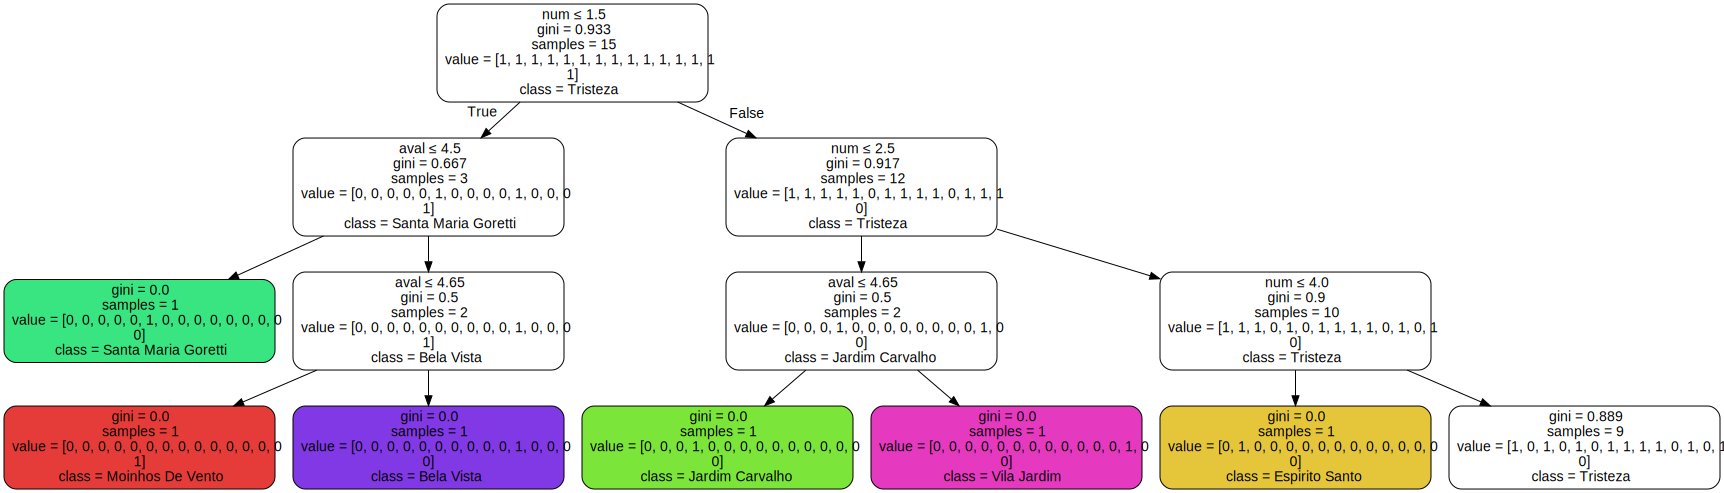

In [242]:
dot_data = export_graphviz(modelo_arvore, out_file=None, 
                           feature_names=['aval', 'num'], 
                           class_names=y_train.unique(), 
                           filled=True, rounded=True, special_characters=True)
grafico_arvore = graphviz.Source(dot_data)
grafico_arvore

In [243]:
y_pred = modelo_arvore.predict(X_test)

In [244]:
acuracia = (y_pred == y_test).sum() / len(y_test)
print('A acurácia do modelo é:', acuracia)

A acurácia do modelo é: 0.0


#Regressão Linear

In [248]:
dados = pd.merge(numescolas_bairro, buffets_bairro, on='bairro')

In [251]:
X = dados[['num']]
y = dados['aval']

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [267]:
lr = LinearRegression()
lr.fit(X_train, y_train)
avaliacao_desejada = 4.6 # avaliação média desejada

In [254]:
y_pred = lr.predict(X_test)

In [259]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination:', r2_score(y_test, y_pred))

Mean squared error: 0.02179759319440779
Coefficient of determination: -0.07266406363732436


In [268]:
escolas_necessarias = (avaliacao_desejada - lr.intercept_) / lr.coef_
print('Número de escolas necessárias para atingir a avaliação média de', avaliacao_desejada, ':', escolas_necessarias[0])

Número de escolas necessárias para atingir a avaliação média de 4.6 : 16.933333333333568


# Resultado

In [276]:
numescolas_bairro = numescolas_bairro.query('num >= 16')
numescolas_bairro = numescolas_bairro.sort_values(by='num', ascending=False)

print (numescolas_bairro)

          bairro  num
0  Rubem Berta     27
1  Petropolis      21
2    Partenon      17


Baseado na ánalise da regressão linear, os bairros ideias para a abertura de um novo negócio seriam os que tem mais de 16 escolas. Nesse caso, os bairros Rubem Berta, Petropolis e Partenon cumprem o requisito.